In [1]:
import numpy as np # For numerical computing, arrays, and slicing
import pandas as pd # For data manipulation and analysis
import matplotlib.pyplot as plt # For creating visualizations 
import seaborn as sns # For statistical data visualization
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # For hierarchical clustering, linkage, dendrogram plotting, and cluster assignment
from sklearn.cluster import AgglomerativeClustering # For hierarchical clustering implementation
from sklearn.preprocessing import StandardScaler # For standardization 
import skfuzzy as fuzz # For fuzzy logic operations and fuzzy clustering
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score # For cluster evaluation
from skfuzzy import control as ctrl # For fuzzy control systems
from sklearn_extra.cluster import KMedoids # For k-medoids clustering

# Preprocessing


In [2]:
# Read the file
df = pd.read_excel(r"C:\Users\LENOVO\Desktop\Online Retail.xlsx") 

In [3]:
df 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
# Shape of data (Rows & columns)
df.shape 

(541909, 8)

In [5]:
# info of data to see types of columns and nulls
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# see types of column
df.dtypes 

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
# drop identical rows
df.drop_duplicates(inplace=True) 

In [8]:
# see shape of data after dropping identical rows
df.shape 

(536641, 8)

In [9]:
# describe the quantiles for numerical columns
df.describe() 

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


In [10]:
# see number of nulls in each column
df.isna().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
# fill the Na in description with no description to not be null
df['Description'].fillna(value='No Description',inplace=True) 
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [12]:
# drop nulls because without customer id we do not need the row
df.dropna(inplace=True) 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
#shape of data
df.shape 

(401604, 8)

In [14]:
# convert the InvoiceDate column to date time format days-month-year 24 hours format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 401604, dtype: datetime64[ns]

In [15]:
# Check for nulls
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
# drop rows which their quantity less than or equals zero as negative quantity does not make sense

df.drop(df[df['Quantity']<=0].index,inplace=True)

In [17]:
# Count the number of rows which their unit price less than or equals zero

negative_count = df[df['UnitPrice'] <= 0]['UnitPrice'].count()
negative_count

40

In [18]:
# Filter out negative and zero UnitPrice values
df = df[df['UnitPrice'] > 0]

# Group by StockCode and find the maximum UnitPrice for each StockCode
max_prices = df.groupby('StockCode')['UnitPrice'].max()

# Merge the maximum prices back into the original DataFrame
df = df.merge(max_prices, on='StockCode', suffixes=('', '_max'))

# Replace UnitPrice with the maximum price where UnitPrice is negative or zero
df['UnitPrice'] = df.apply(lambda row: row['UnitPrice_max'] if row['UnitPrice'] <= 0 else row['UnitPrice'], axis=1)

# Drop the redundant columns
df.drop(columns=['UnitPrice_max'], inplace=True)

In [19]:
# Check for negative count after dropping

negative_count = df[df['UnitPrice'] <= 0]['UnitPrice'].count()
negative_count

0

In [20]:
df.shape #shape of data

(392692, 8)

In [21]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [22]:
df.describe() # describe the quantiles for numerical columns

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771891968,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


In [23]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculate the first quartile (Q1)
        Q1 = df[col].quantile(0.25)
        # Calculate the third quartile (Q3)
        Q3 = df[col].quantile(0.75)
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # Define the lower bound
        lower_bound = Q1 - 1.5 * IQR
        # Define the upper bound
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [24]:
# Specify the columns to remove outliers from
columns_to_clean = ['Quantity', 'UnitPrice']

# Remove outliers using the interquartile range
df = remove_outliers_iqr(df, columns_to_clean)

# Print the first few rows of the cleaned DataFrame to verify
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
5,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom
6,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 11:21:00,2.95,15862.0,United Kingdom
...,...,...,...,...,...,...,...,...
392686,580691,90214U,"LETTER ""U"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom
392687,580691,90214W,"LETTER ""W"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom
392688,580691,90214Z,"LETTER ""Z"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom
392689,580865,90089,PINK CRYSTAL SKULL PHONE CHARM,12,2011-12-06 11:58:00,0.19,17914.0,United Kingdom


## plotting

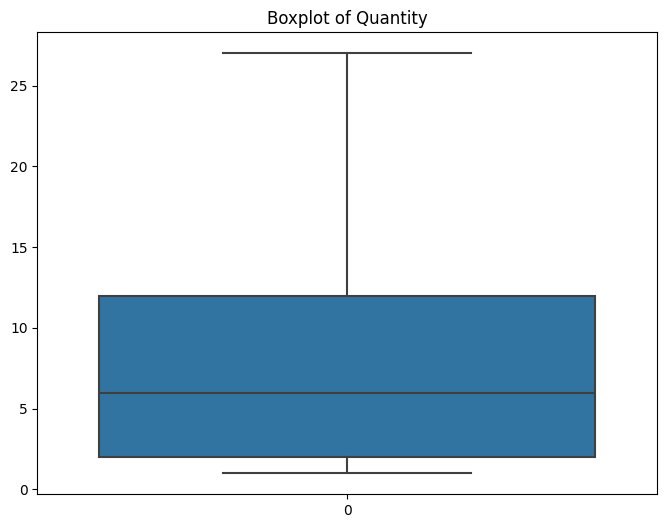

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

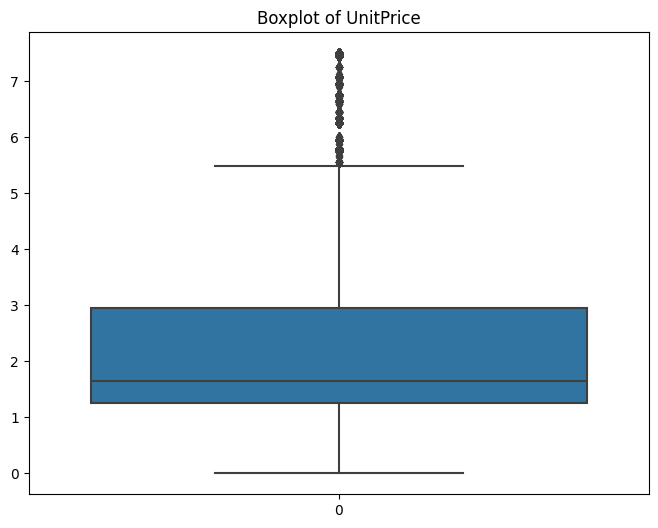

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.show()

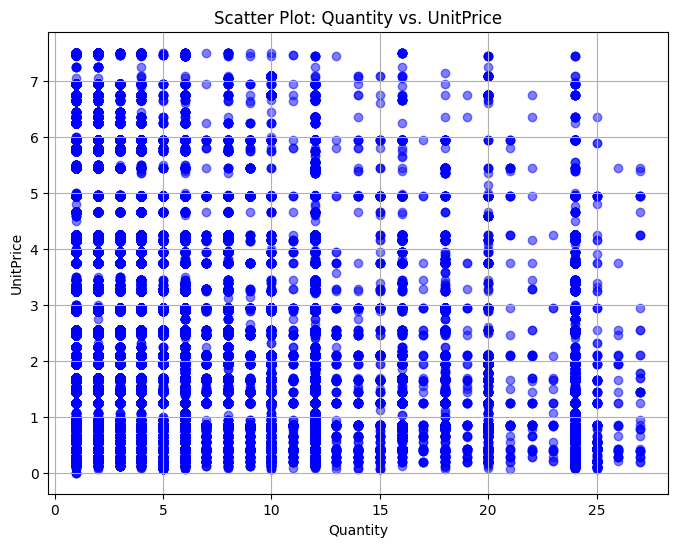

In [27]:
# Create a scatter plot for Quantity vs. UnitPrice
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], color='blue', alpha=0.5)
plt.title('Scatter Plot: Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.grid(True)
plt.show()

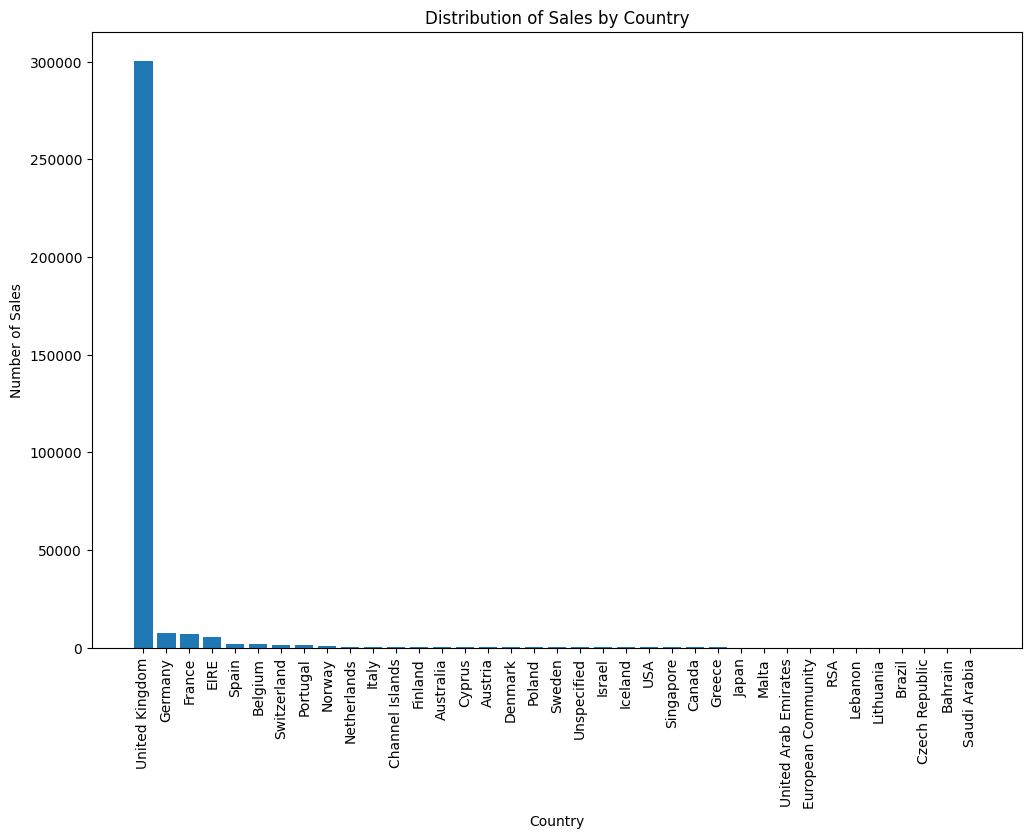

In [28]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(12, 8))  
plt.bar(country_counts.index, country_counts.values)  
plt.xticks(rotation=90)
plt.title('Distribution of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.show()

## RFM
I read in the domian and found out to group customers to clusters will be based on RFM 
which is 
Recency : the last time the customer made a purchase ,
Frequency : the number of times a customer made a purchase ,
Monetary value : the amount money a customer paid 

In [29]:
# make new column called amount to see the total money spent from customer in each purchase
df['Money paid'] = df['Quantity']*df['UnitPrice'] 

# sum the total money of each customer in all his purchases
newdf = df.groupby('CustomerID')['Money paid'].sum()
newdf = newdf.reset_index() # reset index
newdf

,CustomerID,Money paid
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94
...,...,...
4186,18280.0,137.00
4187,18281.0,46.92
4188,18282.0,113.13
4189,18283.0,2002.63


In [30]:
# get the number of time each customer made a purchase

data = df.groupby('CustomerID')['InvoiceNo'].nunique() 
data = data.reset_index() # reset index
data.columns = ['CustomerID', 'Number of purchase'] 
data

,CustomerID,Number of purchase
0,12347.0,7
1,12348.0,3
2,12349.0,1
3,12350.0,1
4,12352.0,7
...,...,...
4186,18280.0,1
4187,18281.0,1
4188,18282.0,2
4189,18283.0,16


In [31]:
# merge the two dataframes with each other
newdf = pd.merge(newdf, data, on='CustomerID', how='inner') 
newdf

,CustomerID,Money paid,Number of purchase
0,12347.0,3314.73,7
1,12348.0,90.20,3
2,12349.0,999.15,1
3,12350.0,294.40,1
4,12352.0,1130.94,7
...,...,...,...
4186,18280.0,137.00,1
4187,18281.0,46.92,1
4188,18282.0,113.13,2
4189,18283.0,2002.63,16


In [32]:
# describe the quantiles for numerical columns
newdf.describe() 

,CustomerID,Money paid,Number of purchase
count,4191.000000,4191.000000,4191.000000
mean,15290.900262,1025.883127,4.014794
std,1719.057238,2200.186051,7.016195
min,12347.000000,1.900000,1.000000
25%,13809.500000,206.160000,1.000000
50%,15281.000000,465.970000,2.000000
75%,16770.500000,1127.340000,4.000000
max,18287.000000,84980.890000,196.000000


In [33]:
# reset index and drop column index because it is useless
newdf.reset_index().drop('index',axis=1) 

,CustomerID,Money paid,Number of purchase
0,12347.0,3314.73,7
1,12348.0,90.20,3
2,12349.0,999.15,1
3,12350.0,294.40,1
4,12352.0,1130.94,7
...,...,...,...
4186,18280.0,137.00,1
4187,18281.0,46.92,1
4188,18282.0,113.13,2
4189,18283.0,2002.63,16


In [34]:
# get the most recent date recorded

max_date = max(df['InvoiceDate'])
max_date 

Timestamp('2011-12-09 12:50:00')

In [35]:
# make new column that has the difference between the last date recorded and each date recorded
df['Recency'] = max_date - df['InvoiceDate']

# get only the days from it 
df['Recency'] = df['Recency'].dt.days 
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Money paid,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30,373
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.30,373
5,536396,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom,15.30,373
6,536401,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 11:21:00,2.95,15862.0,United Kingdom,11.80,373
...,...,...,...,...,...,...,...,...,...,...
392686,580691,90214U,"LETTER ""U"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom,3.48,3
392687,580691,90214W,"LETTER ""W"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom,3.48,3
392688,580691,90214Z,"LETTER ""Z"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790.0,United Kingdom,3.48,3
392689,580865,90089,PINK CRYSTAL SKULL PHONE CHARM,12,2011-12-06 11:58:00,0.19,17914.0,United Kingdom,2.28,3


In [36]:
# group each customerId with the new column and get the min number to get the last time each customer made a purchase

dataa = df.groupby('CustomerID')['Recency'].min() 
dataa = dataa.reset_index() # reset index
dataa

,CustomerID,Recency
0,12347.0,1
1,12348.0,248
2,12349.0,18
3,12350.0,309
4,12352.0,35
...,...,...
4186,18280.0,277
4187,18281.0,180
4188,18282.0,7
4189,18283.0,3


In [37]:
# merge the two dataframes with each other
newdf = pd.merge(newdf, dataa, on='CustomerID', how='inner') 
newdf 

,CustomerID,Money paid,Number of purchase,Recency
0,12347.0,3314.73,7,1
1,12348.0,90.20,3,248
2,12349.0,999.15,1,18
3,12350.0,294.40,1,309
4,12352.0,1130.94,7,35
...,...,...,...,...
4186,18280.0,137.00,1,277
4187,18281.0,46.92,1,180
4188,18282.0,113.13,2,7
4189,18283.0,2002.63,16,3


In [38]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4191 entries, 0 to 4190
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          4191 non-null   float64
 1   Money paid          4191 non-null   float64
 2   Number of purchase  4191 non-null   int64  
 3   Recency             4191 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 131.1 KB


In [39]:
newdf.describe()

,CustomerID,Money paid,Number of purchase,Recency
count,4191.000000,4191.000000,4191.000000,4191.000000
mean,15290.900262,1025.883127,4.014794,91.493200
std,1719.057238,2200.186051,7.016195,99.908578
min,12347.000000,1.900000,1.000000,0.000000
25%,13809.500000,206.160000,1.000000,17.000000
50%,15281.000000,465.970000,2.000000,50.000000
75%,16770.500000,1127.340000,4.000000,143.000000
max,18287.000000,84980.890000,196.000000,373.000000


In [40]:
newdf.shape # shape of data

(4191, 4)

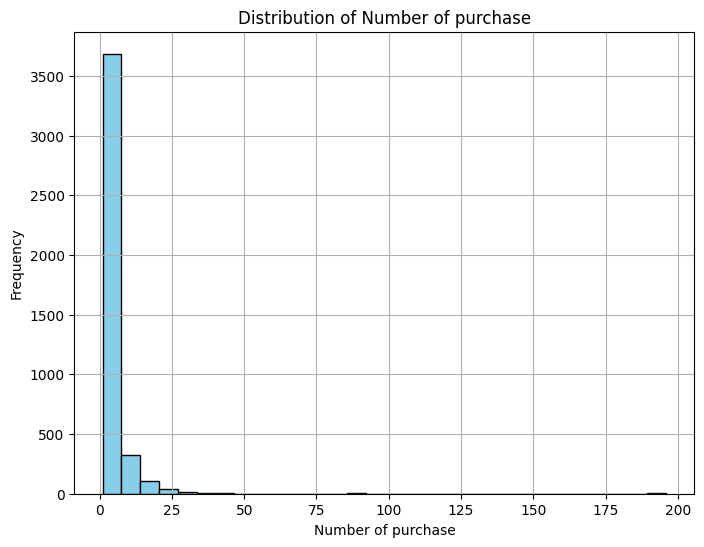

In [41]:
# Create a histogram to show distribution of number of purchases
plt.figure(figsize=(8, 6))
plt.hist(newdf['Number of purchase'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of purchase')
plt.xlabel('Number of purchase')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

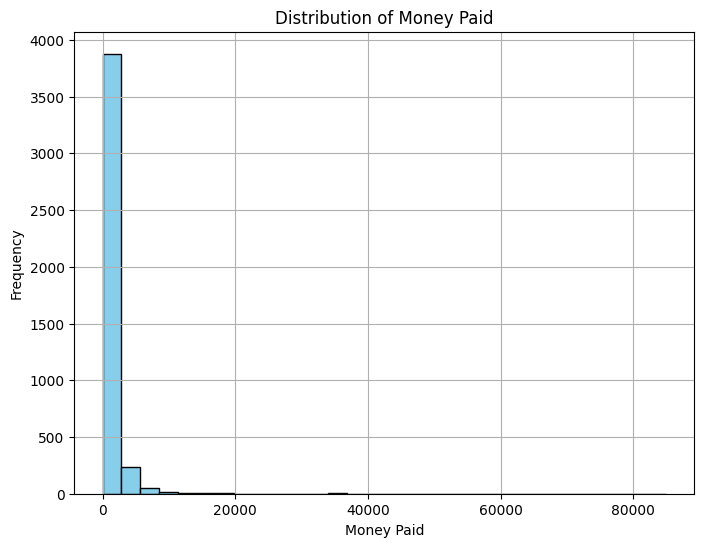

In [42]:
# Create a histogram to show distribution of money paid
plt.figure(figsize=(8, 6))
plt.hist(newdf['Money paid'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Money Paid')
plt.xlabel('Money Paid')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

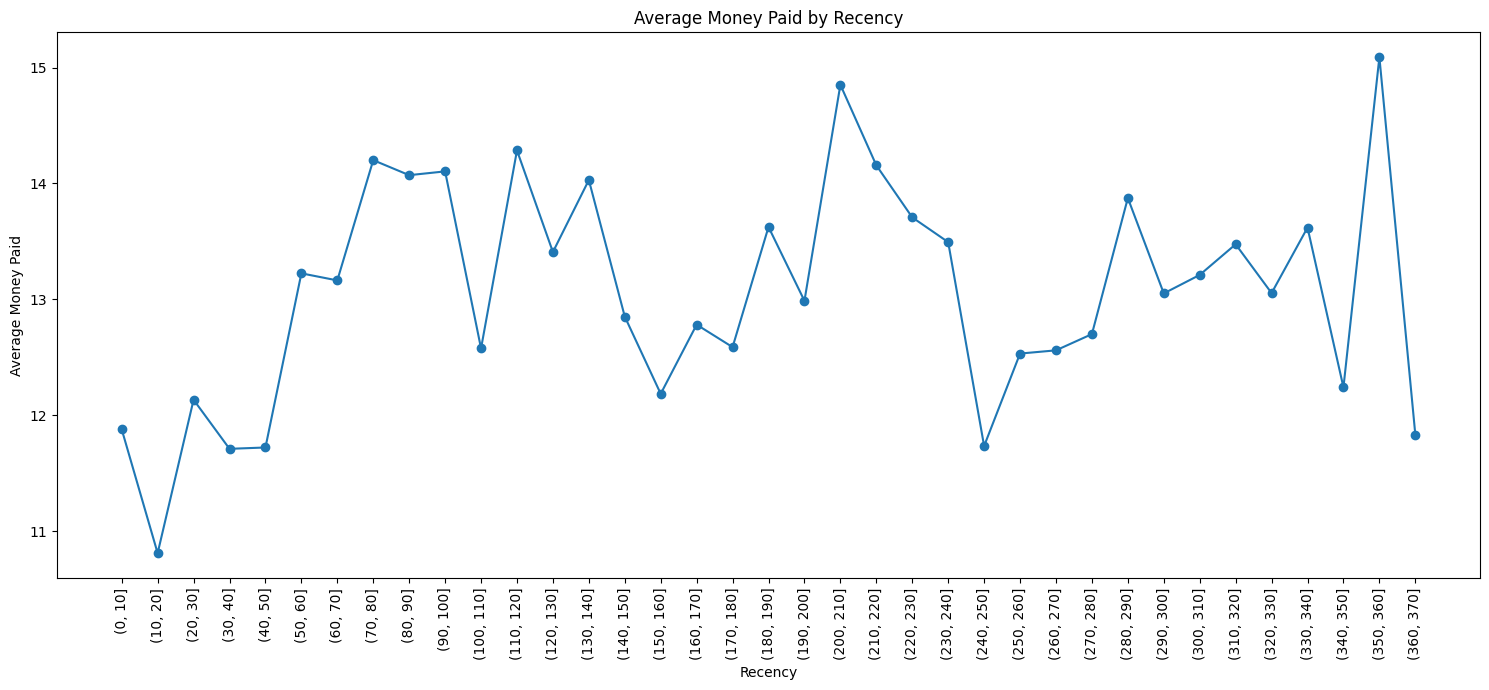

In [43]:
# Bin the recency values to calculate average money paid for each bin
df['RecencyBin'] = pd.cut(df['Recency'], bins=range(0, max(df['Recency']), 10))  
grouped = df.groupby('RecencyBin')['Money paid'].mean().reset_index()

# Plot the average money paid by recency bin
plt.figure(figsize=(15, 7))
plt.plot(grouped['RecencyBin'].astype(str), grouped['Money paid'], marker='o')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.xlabel('Recency')
plt.ylabel('Average Money Paid')
plt.title('Average Money Paid by Recency')
plt.tight_layout()  
plt.show()


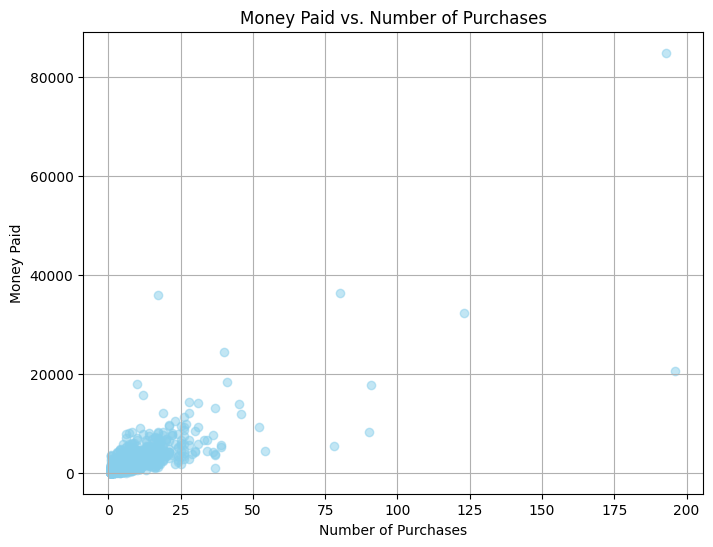

In [44]:
# Create a scatter plot for Money Paid & Number of Purchases 
plt.figure(figsize=(8, 6))
plt.scatter(newdf['Number of purchase'], newdf['Money paid'], color='skyblue', alpha=0.5)
plt.title('Money Paid vs. Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Money Paid')
plt.grid(True)
plt.show()

## Normalization of data

In [45]:
# drop column customer id as it is not needed for normalization
x = newdf.drop('CustomerID',axis=1)

# replace any nan with zero
x =np.nan_to_num(x)

# normlize the data
data_normalized =StandardScaler().fit_transform(x) 
data_normalized

array([[ 1.0404211 ,  0.42552448, -0.90586814],
       [-0.42532529, -0.14465315,  1.56668705],
       [-0.01215184, -0.42974197, -0.73569228],
       ...,
       [-0.4149022 , -0.28719756, -0.84580607],
       [ 0.44399128,  1.70842415, -0.88584745],
       [-0.02960245, -0.14465315, -0.495444  ]])

# Hierarchical clustering

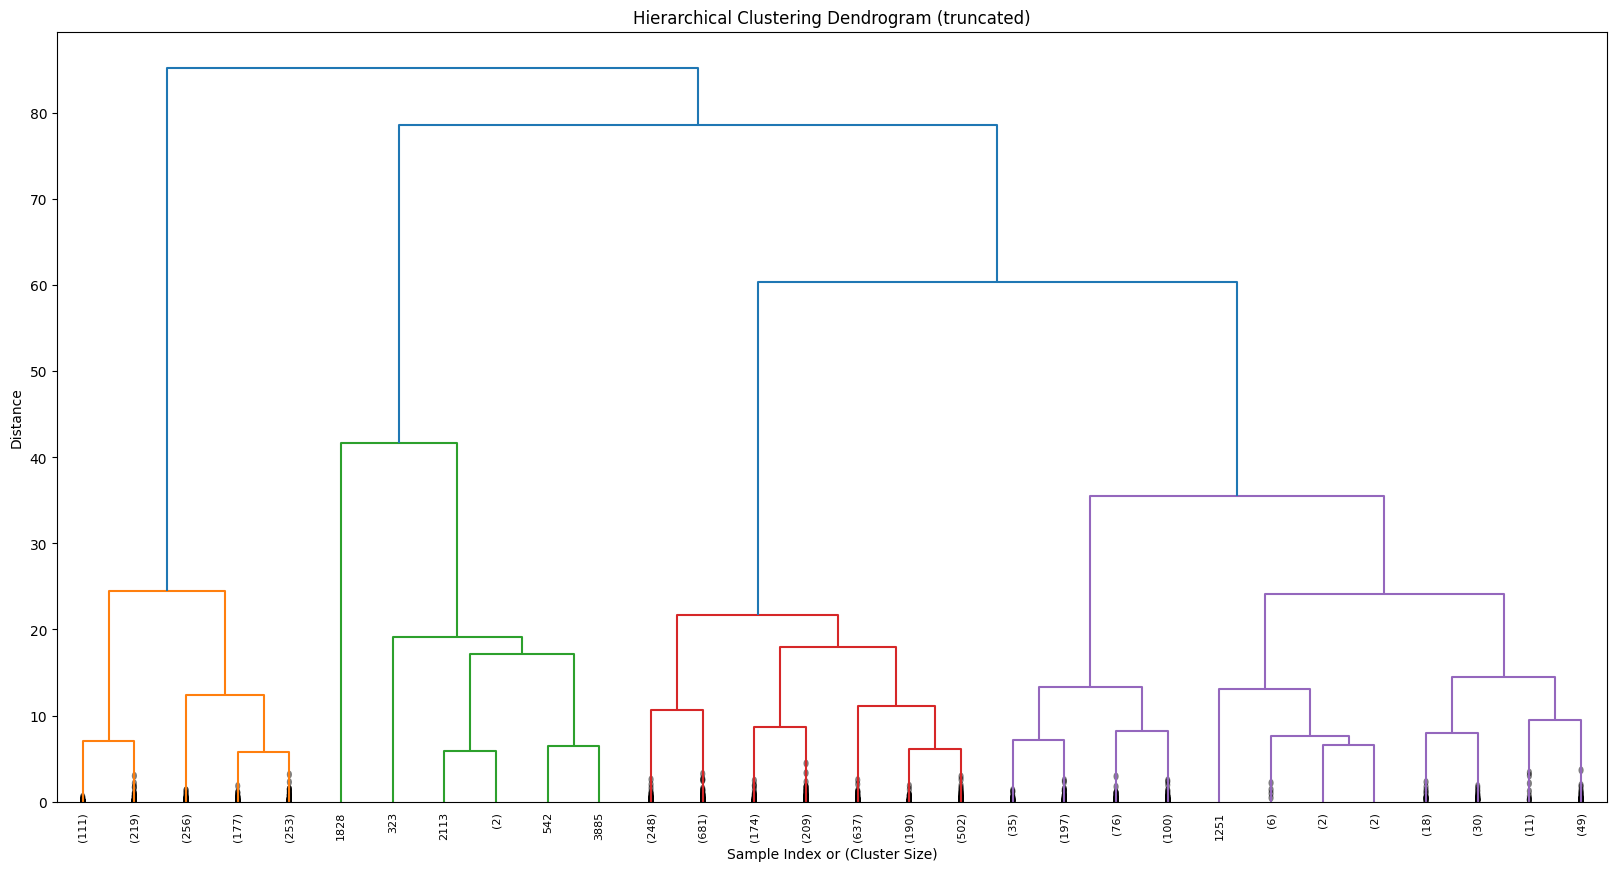

In [46]:
# Perform hierarchical clustering
linkage_type = 'ward'
linkage_matrix = linkage(data_normalized, method=linkage_type)

# Plot the dendrogram, truncate mode set to lastp to show the last p merged clusters
plt.figure(figsize=(20, 10))  
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  
    p=30,  
    leaf_rotation=90.,  
    leaf_font_size=8.,  
    show_contracted=True,  
)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()


In [47]:
num_clusters = 4  # Number of clusters based on the dendrogram

agg_clustering = AgglomerativeClustering(num_clusters, affinity='euclidean', linkage='ward')

# Fit the model to your data
hierarchical_labels = agg_clustering.fit_predict(data_normalized)

print(hierarchical_labels)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[2 1 3 ... 3 2 3]


In [48]:
# make new column for clusters to see each row belongs to which cluster
newdf["cluster labels"] = hierarchical_labels  
newdf

,CustomerID,Money paid,Number of purchase,Recency,cluster labels
0,12347.0,3314.73,7,1,2
1,12348.0,90.20,3,248,1
2,12349.0,999.15,1,18,3
3,12350.0,294.40,1,309,1
4,12352.0,1130.94,7,35,3
...,...,...,...,...,...
4186,18280.0,137.00,1,277,1
4187,18281.0,46.92,1,180,1
4188,18282.0,113.13,2,7,3
4189,18283.0,2002.63,16,3,2


In [49]:
# see properties of each cluster
newdf.drop("CustomerID",axis=1).groupby('cluster labels').describe().T 

cluster labels                       0            1             2            3
Money paid         count      7.000000  1016.000000    527.000000  2641.000000
                   mean   29335.934286   300.808190   3709.784592   694.224552
                   std    27043.324449   330.698693   2940.305254   617.143676
                   min     5357.930000     2.900000    600.030000     1.900000
                   25%    12960.185000   110.512500   2000.860000   240.930000
                   50%    20519.880000   211.350000   3081.550000   502.260000
                   75%    34286.235000   357.727500   4374.100000   957.370000
                   max    84980.890000  3429.470000  36019.840000  3396.640000
Number of purchase count      7.000000  1016.000000    527.000000  2641.000000
                   mean     121.571429     1.559055     13.136622     2.827717
                   std       51.964273     1.162830      7.484606     1.824145
                   min       78.000000     1.000000      1.000000     1.000000
                   25%       85.000000     1.000000      8.000000     1.000000
                   50%       91.000000     1.000000     11.000000     2.000000
                   75%      158.000000     2.000000     16.000000     4.000000
                   max      196.000000    12.000000     54.000000    11.000000
Recency            count      7.000000  1016.000000    527.000000  2641.000000
                   mean       1.000000   248.649606     13.508539    46.836047
                   std        1.414214    65.262541     20.841504    37.179774
                   min        0.000000   136.000000      0.000000     0.000000
                   25%        0.000000   191.000000      2.000000    17.000000
                   50%        0.000000   245.000000      9.000000    38.000000
                   75%        2.000000   298.500000     18.000000    70.000000
                   max        3.000000   373.000000    371.000000   167.000000

In [50]:
# drop the cluster column
newdf.drop("cluster labels",axis=1,inplace=True) 
newdf

,CustomerID,Money paid,Number of purchase,Recency
0,12347.0,3314.73,7,1
1,12348.0,90.20,3,248
2,12349.0,999.15,1,18
3,12350.0,294.40,1,309
4,12352.0,1130.94,7,35
...,...,...,...,...
4186,18280.0,137.00,1,277
4187,18281.0,46.92,1,180
4188,18282.0,113.13,2,7
4189,18283.0,2002.63,16,3


# Fuzzy Clustering

In [51]:
# Define a range for the number of clusters
k_range = range(2, 11)

# Initialize list to store the fuzzy partition coefficients (FPC)
fpcs = []

# Apply Fuzzy C-Means for different numbers of clusters and store the FPC values
for k in k_range:
    cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(
        data_normalized.T, k, 2, error=0.005, maxiter=1000, seed=0)
    fpcs.append(fpc)

In [52]:
# Find the optimal number of clusters as the one with the highest FPC
optimal_k = fpcs.index(max(fpcs)) + 2  # The index in k_range starts at 0 so we add 2 (our range start)

# Apply Fuzzy C-Means with the optimal number of clusters to get the final clustering
cntr, u_final, _, _, _, _, _ = fuzz.cluster.cmeans(
    data_normalized.T, optimal_k, 2, error=0.005, maxiter=1000, seed=0)

# Assign each data point to a cluster with the highest membership degree
clusters = np.argmax(u_final, axis=0)

In [53]:
# Calculate the silhouette score for the optimal clustering
silhouette_avg_fuzzy = silhouette_score(data_normalized, clusters)
print('Optimal number of clusters:', optimal_k)
print('Silhouette Score for optimal clustering:', silhouette_avg_fuzzy)

# Add the cluster labels back to the original dataframe
newdf['Cluster'] = clusters

Optimal number of clusters: 2
Silhouette Score for optimal clustering: 0.5181810856262623


In [54]:
# View summary statistics of the clusters
for i in range(optimal_k):
    print(f'\nCluster {i}:')
    print(newdf[newdf['Cluster'] == i].describe())


Cluster 0:
         CustomerID    Money paid  Number of purchase      Recency  Cluster
count   3070.000000   3070.000000         3070.000000  3070.000000   3070.0
mean   15277.289251   1283.904082            4.901303    37.769707      0.0
std     1708.300459   2512.048727            7.966595    32.401975      0.0
min    12347.000000      1.900000            1.000000     0.000000      0.0
25%    13810.500000    293.022500            2.000000    11.000000      0.0
50%    15274.500000    656.110000            3.000000    28.000000      0.0
75%    16750.750000   1504.045000            6.000000    59.000000      0.0
max    18287.000000  84980.890000          196.000000   143.000000      0.0

Cluster 1:
         CustomerID   Money paid  Number of purchase      Recency  Cluster
count   1121.000000  1121.000000         1121.000000  1121.000000   1121.0
mean   15328.175736   319.260170            1.586976   238.621766      1.0
std     1748.405239   368.792696            1.482568    69.914244  

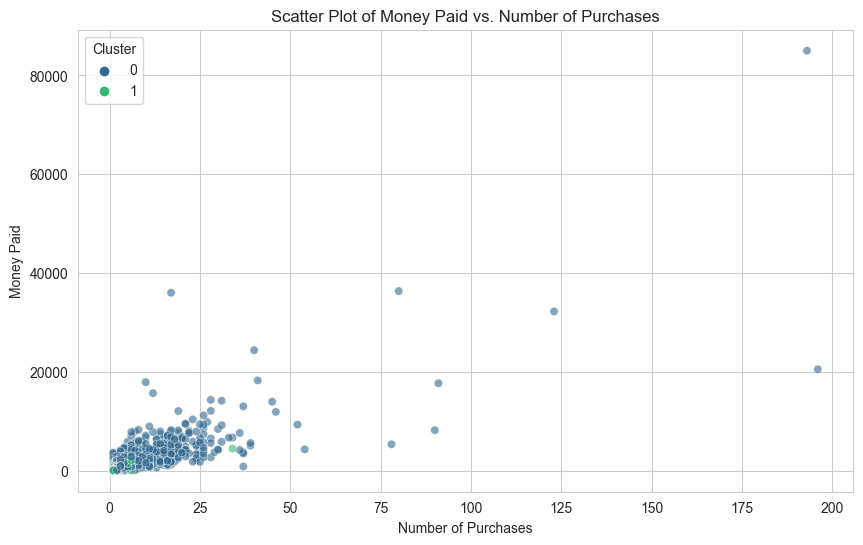

In [55]:
sns.set_style("whitegrid")

# Data preparation
clusters = newdf['Cluster']
features = newdf[['Money paid', 'Number of purchase', 'Recency']]

# Scatter Plot for money paid and number of purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number of purchase', y='Money paid', hue='Cluster', data=newdf, palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Money Paid vs. Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Money Paid')
plt.legend(title='Cluster')
plt.show()

<Figure size 1000x600 with 0 Axes>

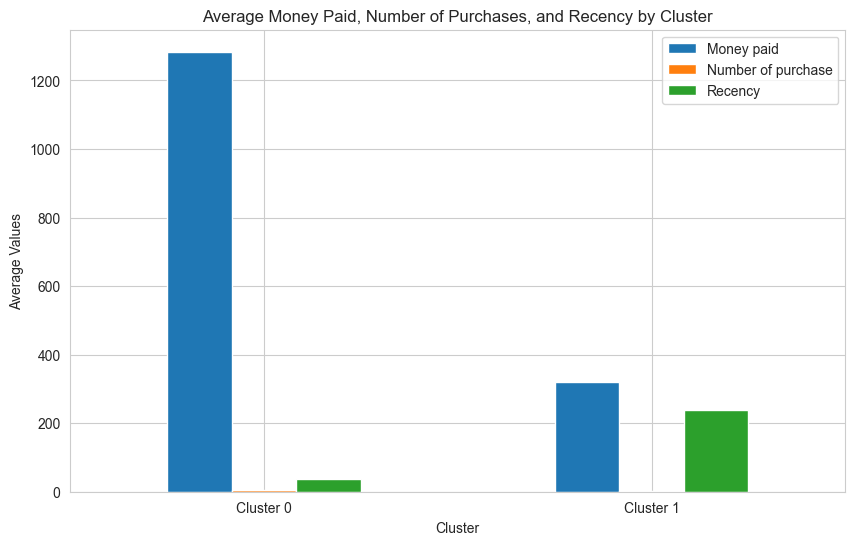

In [56]:
# Bar Chart for Average Values by Cluster
plt.figure(figsize=(10, 6))
cluster_means = newdf.groupby('Cluster').mean()[['Money paid', 'Number of purchase', 'Recency']]
cluster_means.plot(kind='bar', figsize=(10, 6))
plt.title('Average Money Paid, Number of Purchases, and Recency by Cluster')
plt.ylabel('Average Values')
plt.xticks(ticks=[0, 1], labels=['Cluster 0', 'Cluster 1'], rotation=0)
plt.show()

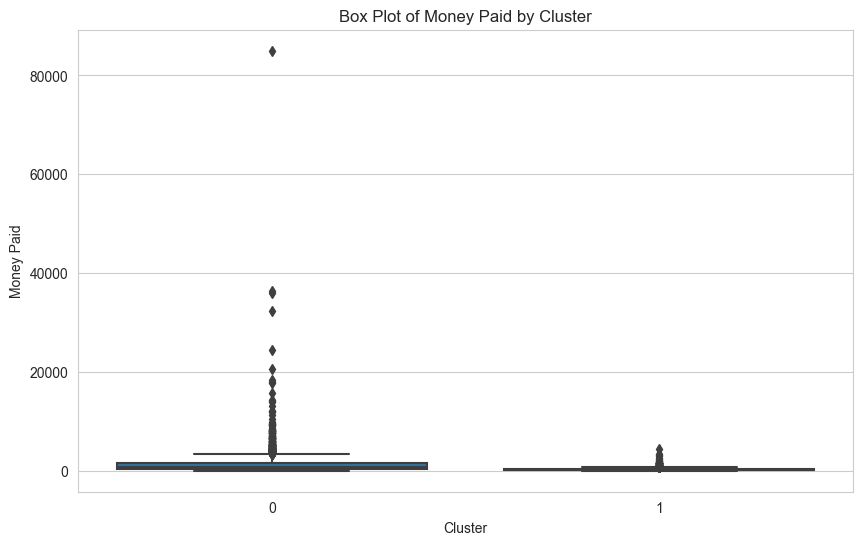

In [57]:
# Box Plot for money paid by clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Money paid', data=newdf)
plt.title('Box Plot of Money Paid by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Money Paid')
plt.show()

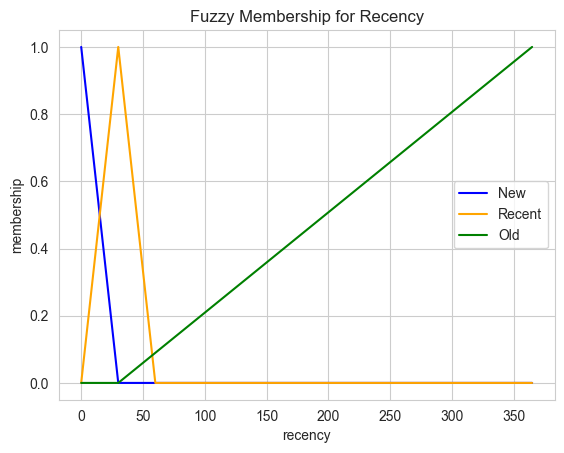

In [58]:
# Define the universe of input values
x_recency = np.arange(0, 366, 1)
x_engagement = np.arange(0, 11, 1)

# Membership functions for recency
new = fuzz.trimf(x_recency, [0, 0, 30])
recent = fuzz.trimf(x_recency, [0, 30, 60])
old = fuzz.trimf(x_recency, [30, 365, 365]) 

# Membership functions for customer engagement
low_engagement = fuzz.trimf(x_engagement, [0, 0, 5])
medium_engagement = fuzz.trimf(x_engagement, [0, 5, 10])
high_engagement = fuzz.trimf(x_engagement, [5, 10, 10])

# Plot the membership functions for recency
plt.figure()
plt.plot(x_recency, new, 'b', linewidth=1.5, label='New')
plt.plot(x_recency, recent, 'orange', linewidth=1.5, label='Recent')
plt.plot(x_recency, old, 'g', linewidth=1.5, label='Old')
plt.title('Fuzzy Membership for Recency')
plt.xlabel('recency')
plt.ylabel('membership')
plt.legend()
plt.show()

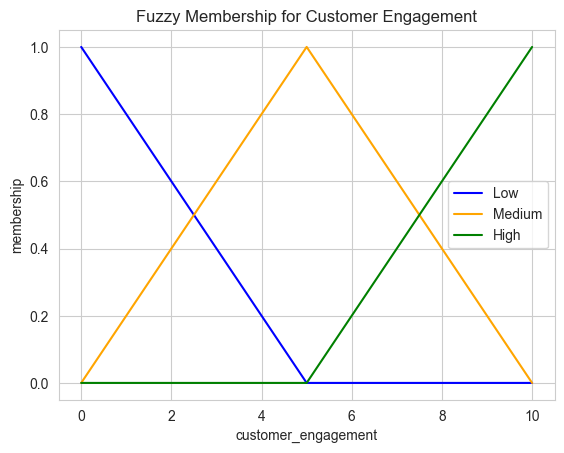

In [59]:
# Plot the membership functions for customer engagement
plt.figure()
plt.plot(x_engagement, low_engagement, 'b', linewidth=1.5, label='Low')
plt.plot(x_engagement, medium_engagement, 'orange', linewidth=1.5, label='Medium')
plt.plot(x_engagement, high_engagement, 'g', linewidth=1.5, label='High')
plt.title('Fuzzy Membership for Customer Engagement')
plt.xlabel('customer_engagement')
plt.ylabel('membership')
plt.legend()
plt.show()

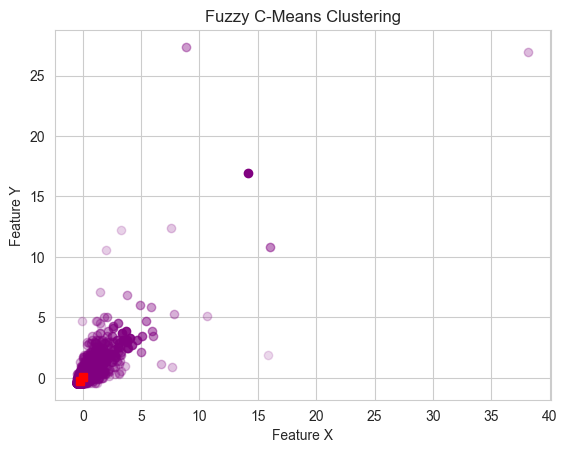

In [60]:
# Create a scatter plot for clustering results
feature_x = data_normalized[:, 0]  # Replace with actual index of feature
feature_y = data_normalized[:, 1]  # Replace with actual index of feature
u_max = np.max(u, axis=0)  # Maximum membership for each data point

# Plot each data point with a color intensity based on its maximum membership
plt.figure()
for i in range(len(u_max)):
    plt.scatter(feature_x[i], feature_y[i], color='purple', alpha=u_max[i])

# Plot the cluster centers
for pt in cntr:
    plt.plot(pt[0], pt[1], 'rs')

plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.show()

# K Medoids

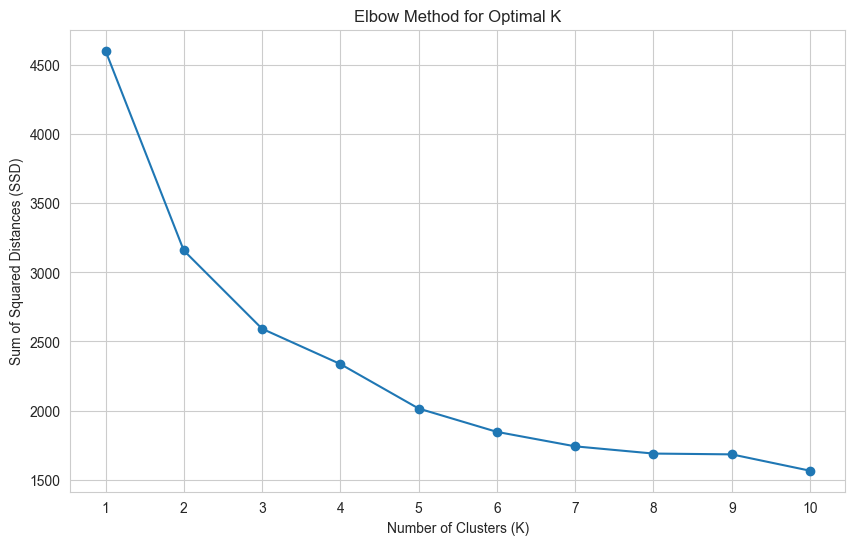

In [61]:
# Define a range of cluster numbers to try
k_range = range(1, 11)

# Initialize an empty list to store the sum of squared distances (SSD)
ssd = []

# Calculate SSD for each value of k
for k in k_range:
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(data_normalized)
    ssd.append(kmedoids.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, ssd, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [62]:
# Define the number of clusters based on the elbow graph
num_clusters = 3

# Initialize and fit the KMedoids model
kmedoids = KMedoids(n_clusters=num_clusters, random_state=42)
kmedoids.fit(data_normalized)

# Get the cluster labels 
K_cluster_labels = kmedoids.labels_

# Add the cluster labels to the DataFrame
newdf['Cluster'] = K_cluster_labels

# Print the number of data points in each cluster
print(newdf['Cluster'].value_counts())

Cluster
1    2319
0    1056
2     816
Name: count, dtype: int64


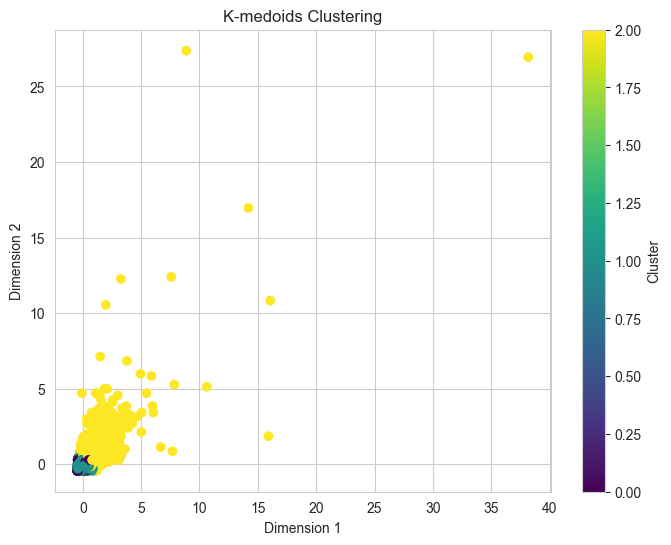

In [63]:
# Visualize the clusters
# Since the dataset likely has more than 2 dimensions, we can't visualize all dimensions at once
# We can visualize pairs of dimensions using scatter plots
# For example, we can visualize the first two dimensions
plt.figure(figsize=(8, 6))
plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=K_cluster_labels, cmap='viridis')
plt.title('K-medoids Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


In [64]:
# Describe properties of each cluster
newdf.drop("CustomerID", axis=1).groupby('Cluster').describe().T

Cluster                             0            1             2
Money paid         count  1056.000000  2319.000000    816.000000
                   mean    310.920607   551.054641   3300.549400
                   std     337.378846   435.750370   4208.972687
                   min       2.900000     1.900000    429.360000
                   25%     111.655000   218.190000   1749.065000
                   50%     216.495000   434.360000   2368.470000
                   75%     369.990000   755.360000   3659.467500
                   max    3429.470000  3396.640000  84980.890000
Number of purchase count  1056.000000  2319.000000    816.000000
                   mean      1.538826     2.459681     11.638480
                   std       1.079937     1.433902     13.141810
                   min       1.000000     1.000000      1.000000
                   25%       1.000000     1.000000      6.000000
                   50%       1.000000     2.000000      8.000000
                   75%       2.000000     3.000000     13.000000
                   max      12.000000     8.000000    196.000000
Recency            count  1056.000000  2319.000000    816.000000
                   mean    244.803030    46.817594     20.056373
                   std      66.895753    35.618205     25.945753
                   min     139.000000     0.000000      0.000000
                   25%     186.000000    18.000000      3.000000
                   50%     240.000000    39.000000     11.000000
                   75%     296.000000    70.000000     28.000000
                   max     373.000000   143.000000    371.000000

In [65]:
# Remove the cluster column 
newdf.drop("Cluster", axis=1, inplace=True)
newdf

,CustomerID,Money paid,Number of purchase,Recency
0,12347.0,3314.73,7,1
1,12348.0,90.20,3,248
2,12349.0,999.15,1,18
3,12350.0,294.40,1,309
4,12352.0,1130.94,7,35
...,...,...,...,...
4186,18280.0,137.00,1,277
4187,18281.0,46.92,1,180
4188,18282.0,113.13,2,7
4189,18283.0,2002.63,16,3


# EVALUATION

we read about how to evaluate clusters and found 3 methods to use which is:
-  silhouette score
-  Davies-Bouldin
-  Calinski-Harabasz

## K-MEDOIDS

In [66]:
silhouette_kmedoids = silhouette_score(data_normalized, K_cluster_labels)
db_index_kmedoids = davies_bouldin_score(data_normalized, K_cluster_labels)
ch_index_kmedoids = calinski_harabasz_score(data_normalized, K_cluster_labels)

print("K-medoids Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmedoids}")
print(f"Davies-Bouldin Index: {db_index_kmedoids}")
print(f"Calinski-Harabasz Index: {ch_index_kmedoids}")


K-medoids Clustering Evaluation:
Silhouette Score: 0.5000212926433656
Davies-Bouldin Index: 0.8530555655822587
Calinski-Harabasz Index: 1719.6138215184492


## Heirarachial

In [67]:
# Now you can calculate the evaluation metrics for hierarchical clustering
silhouette_hierarchical = silhouette_score(data_normalized, hierarchical_labels)
db_index_hierarchical = davies_bouldin_score(data_normalized, hierarchical_labels)
ch_index_hierarchical = calinski_harabasz_score(data_normalized, hierarchical_labels)

print("Hierarchical Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_hierarchical}")
print(f"Davies-Bouldin Index: {db_index_hierarchical}")
print(f"Calinski-Harabasz Index: {ch_index_hierarchical}")


Hierarchical Clustering Evaluation:
Silhouette Score: 0.5476626291711023
Davies-Bouldin Index: 0.722769044717094
Calinski-Harabasz Index: 2955.257720733641


## Fuzzy

In [68]:
# Calculate the evaluation metrics for fuzzy clustering

print("Fuzzy Clustering Evaluation:")
print(f"Silhouette Score (converted to crisp labels): {silhouette_avg_fuzzy}")


Fuzzy Clustering Evaluation:
Silhouette Score (converted to crisp labels): 0.5181810856262623


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3012\4065757264.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3012\4065757264.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3012\4065757264.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(labels, rotation=45)


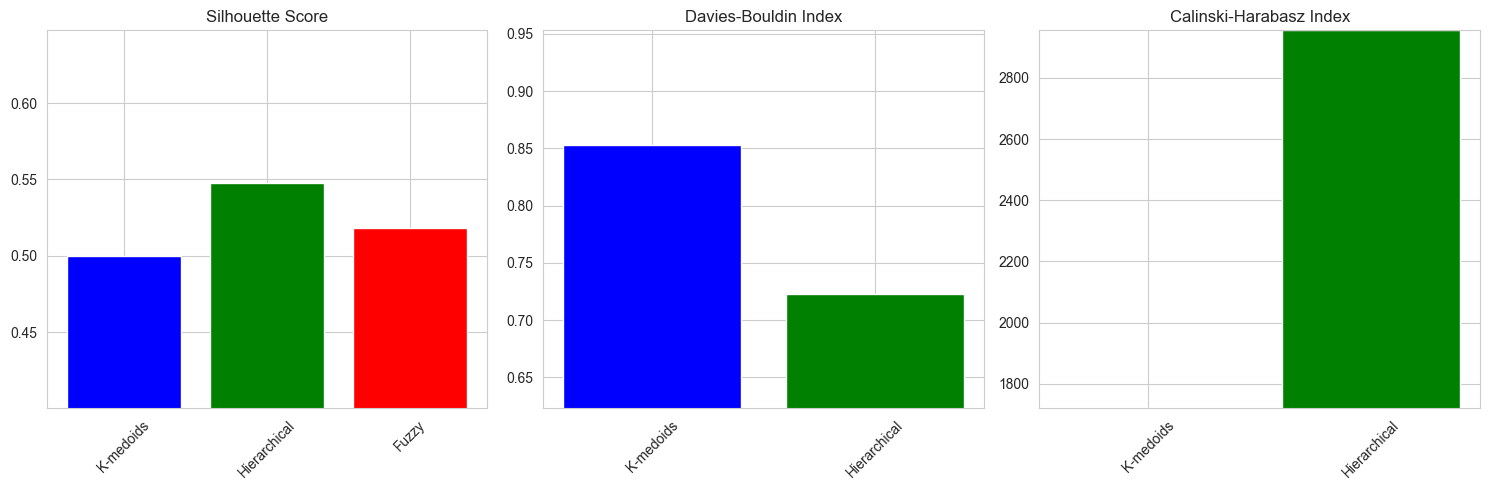

In [69]:
# Assuming you have already calculated the silhouette score for K-medoids and hierarchical clustering
scores = {'Silhouette Score': [silhouette_kmedoids, silhouette_hierarchical, silhouette_avg_fuzzy],
          'Davies-Bouldin Index': [db_index_kmedoids, db_index_hierarchical, np.nan],  # DBI not used for fuzzy
          'Calinski-Harabasz Index': [ch_index_kmedoids, ch_index_hierarchical, np.nan]}  # CHI not used for fuzzy

# Plot the bar charts
labels = ['K-medoids', 'Hierarchical', 'Fuzzy']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(scores):
    ax[i].bar(labels, scores[metric], color=['blue', 'green', 'red'])
    ax[i].set_title(metric)
    ax[i].set_xticklabels(labels, rotation=45)
    ax[i].set_ylim([min([score for score in scores[metric] if score is not None]) - 0.1,
                    max([score for score in scores[metric] if score is not None]) + 0.1])
plt.tight_layout()
plt.show()


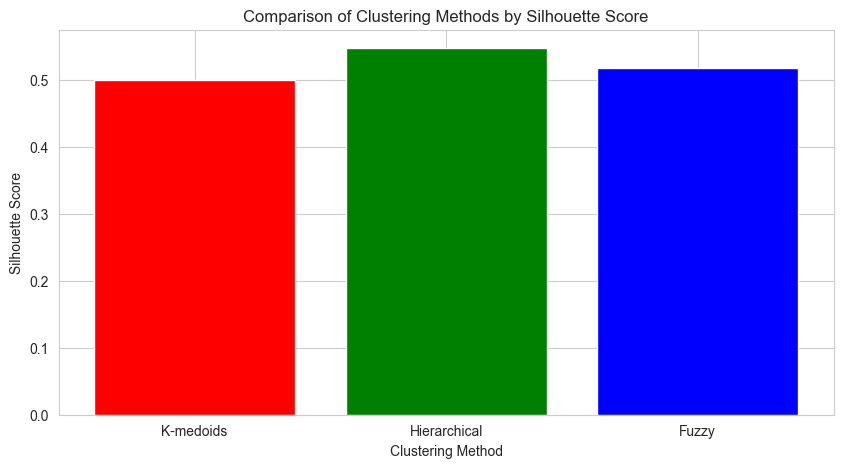

In [70]:
# Define the metrics for each method
silhouette_scores = [silhouette_kmedoids, silhouette_hierarchical, silhouette_avg_fuzzy]
dbi_scores = [db_index_kmedoids, db_index_hierarchical, np.nan] 
chi_scores = [ch_index_kmedoids, ch_index_hierarchical, np.nan]  

# Define the labels for the bar chart
labels = ['K-medoids', 'Hierarchical', 'Fuzzy']

# Create a bar chart for Silhouette Scores
plt.figure(figsize=(10, 5))
bar_positions = np.arange(len(labels))
plt.bar(bar_positions, silhouette_scores, color=['red', 'green', 'blue'])
plt.xticks(bar_positions, labels)
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Methods by Silhouette Score')
plt.show()

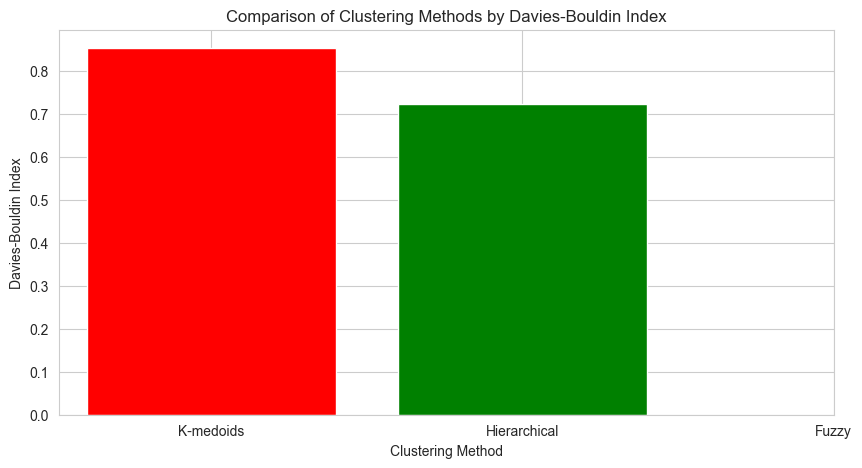

In [71]:
# Create a bar chart for Davies-Bouldin Index
plt.figure(figsize=(10, 5))
plt.bar(bar_positions, dbi_scores, color=['red', 'green', 'blue'])
plt.xticks(bar_positions, labels)
plt.xlabel('Clustering Method')
plt.ylabel('Davies-Bouldin Index')
plt.title('Comparison of Clustering Methods by Davies-Bouldin Index')
plt.show()



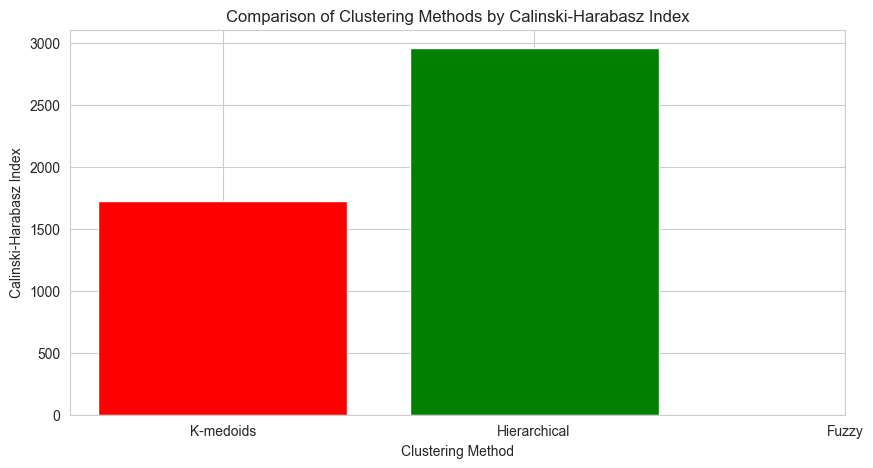

In [72]:
# Create a bar chart for Calinski-Harabasz Index
plt.figure(figsize=(10, 5))
plt.bar(bar_positions, chi_scores, color=['red', 'green', 'blue'])
plt.xticks(bar_positions, labels)
plt.xlabel('Clustering Method')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Comparison of Clustering Methods by Calinski-Harabasz Index')
plt.show()



After reviewing the three evaluation methods we can say that the hierarchical cluster has done the best performance in the three clustering techniques 
- The highest in silhouette score (The higher number the best)
- The lowest in Davies-Bouldin (The lower number the best)
- The highest in Calinski-Harabasz (The higher number the best)